In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/Dell/Sub_Division_IMD_2017.csv")
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [3]:
print(data.keys())
data.isnull().sum()

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')


SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [4]:
data = data.fillna(data.mean())
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4188 non-null   float64
 3   FEB          4188 non-null   float64
 4   MAR          4188 non-null   float64
 5   APR          4188 non-null   float64
 6   MAY          4188 non-null   float64
 7   JUN          4188 non-null   float64
 8   JUL          4188 non-null   float64
 9   AUG          4188 non-null   float64
 10  SEP          4188 non-null   float64
 11  OCT          4188 non-null   float64
 12  NOV          4188 non-null   float64
 13  DEC          4188 non-null   float64
 14  ANNUAL       4188 non-null   float64
 15  JF           4188 non-null   float64
 16  MAM          4188 non-null   float64
 17  JJAS         4188 non-null   float64
 18  OND          4188 non-null   float64
dtypes: flo

In [5]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.776982,35.718931,46.894327,68.118424,122.651174,234.152152,268.625870,188.336044,135.450491,99.111897,68.268852,43.002315,899.792622,59.251404,200.982272,705.821659,166.603928
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.675000,70.875000,175.900000,155.975000,100.400000,14.600000,0.600000,0.100000,805.275000,4.000000,24.175000,574.375000,34.175000
50%,1959.000000,6.000000,6.500000,7.900000,15.500000,36.900000,139.000000,285.250000,258.900000,173.900000,65.750000,9.450000,3.100000,1124.150000,19.000000,75.150000,881.500000,98.350000
75%,1988.000000,22.000000,26.600000,31.300000,49.525000,97.725000,304.300000,418.400000,377.525000,265.825000,148.100000,45.000000,17.700000,1634.075000,50.100000,196.900000,1284.525000,211.350000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


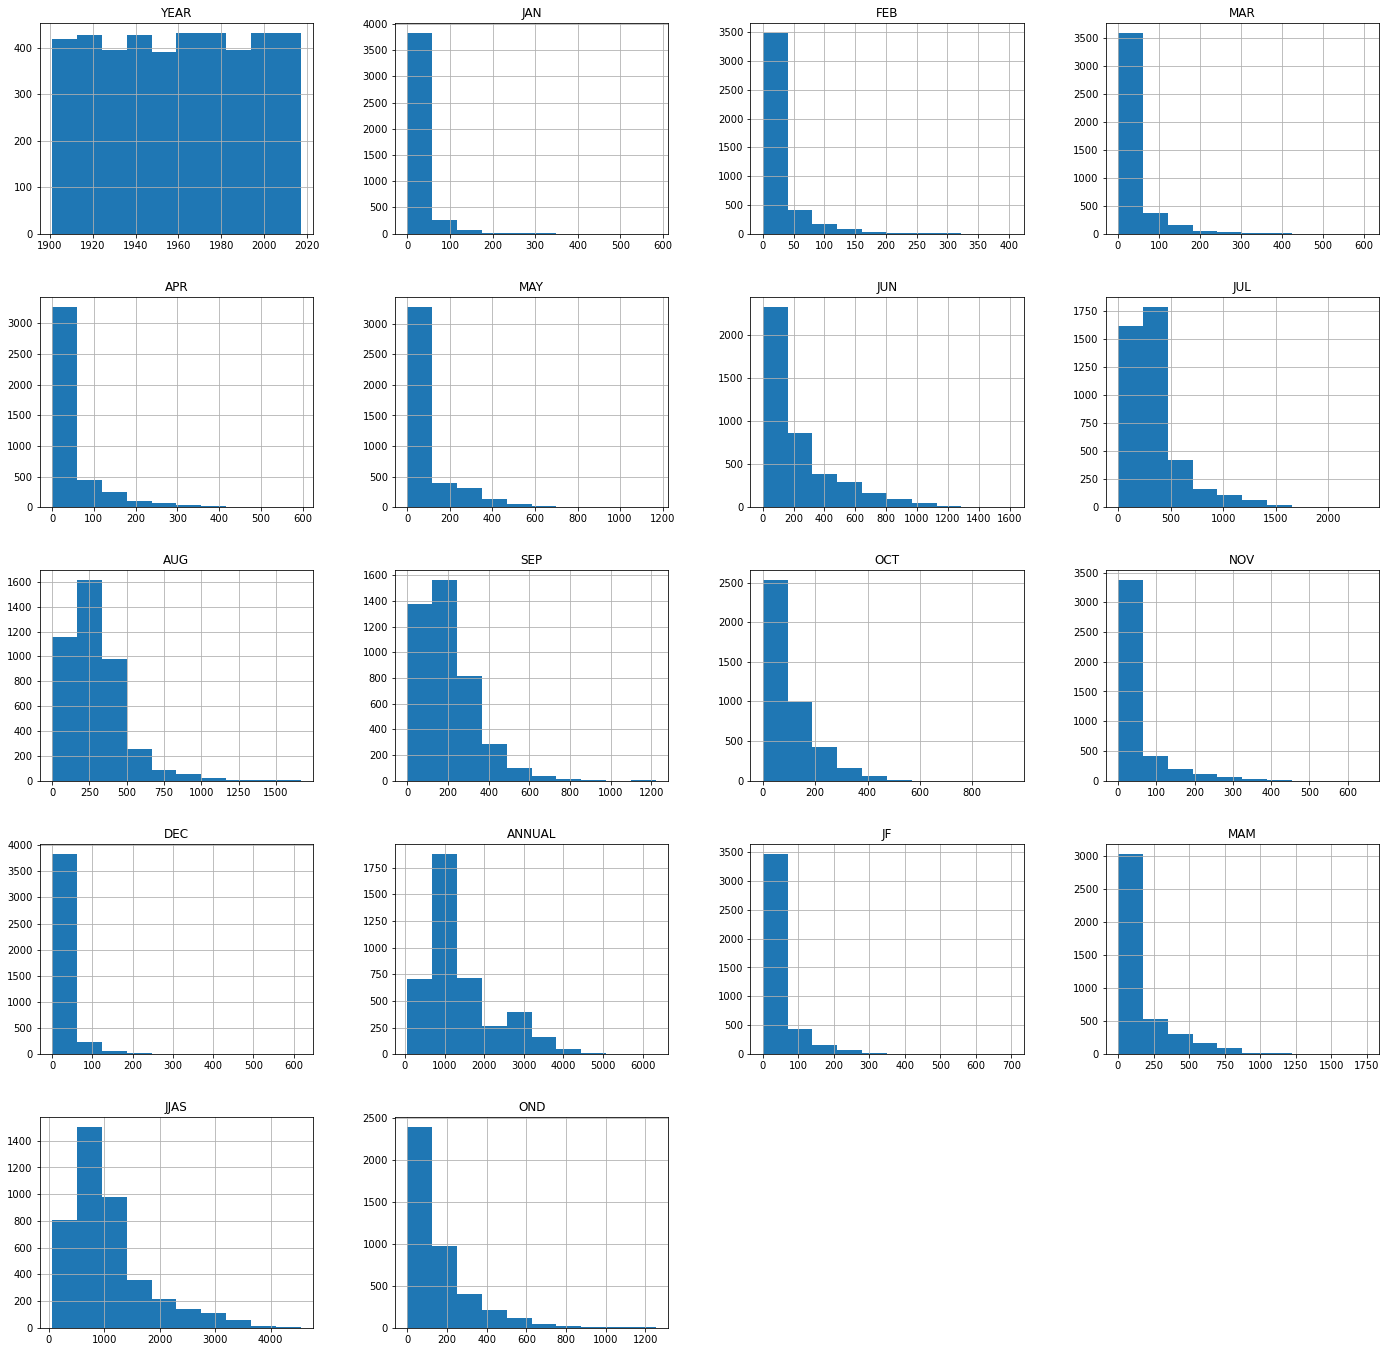

In [6]:
data.hist(figsize=(24,24));
plt.show()

## **Observations**

*  Above histograms show the distribution of rainfall over months.
*  Observed increase in amount of rainfall over months July, August, September.

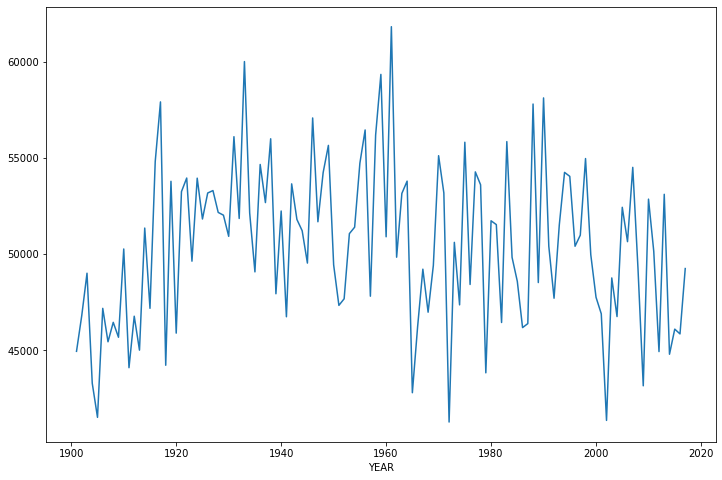

In [43]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));
plt.show()

## **Observations**

* Shows distribution of rainfall over years.
* Observed high amount of rainfall in 1960s.

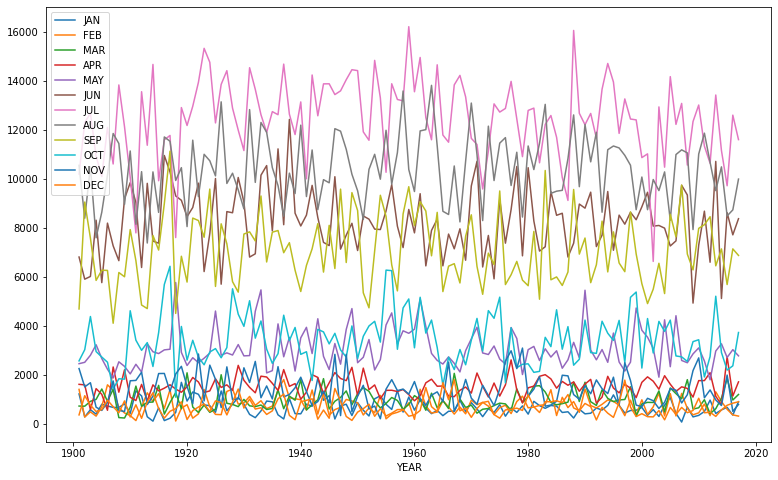

In [8]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));
plt.show()

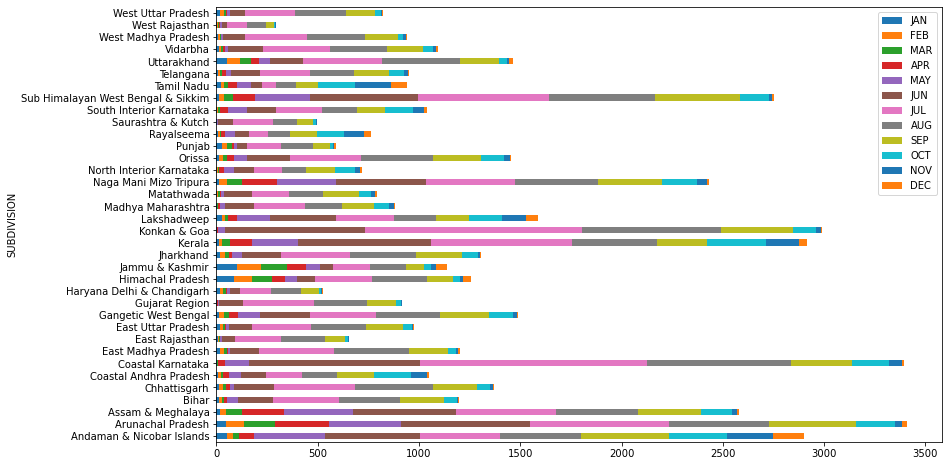

In [9]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));
plt.show()

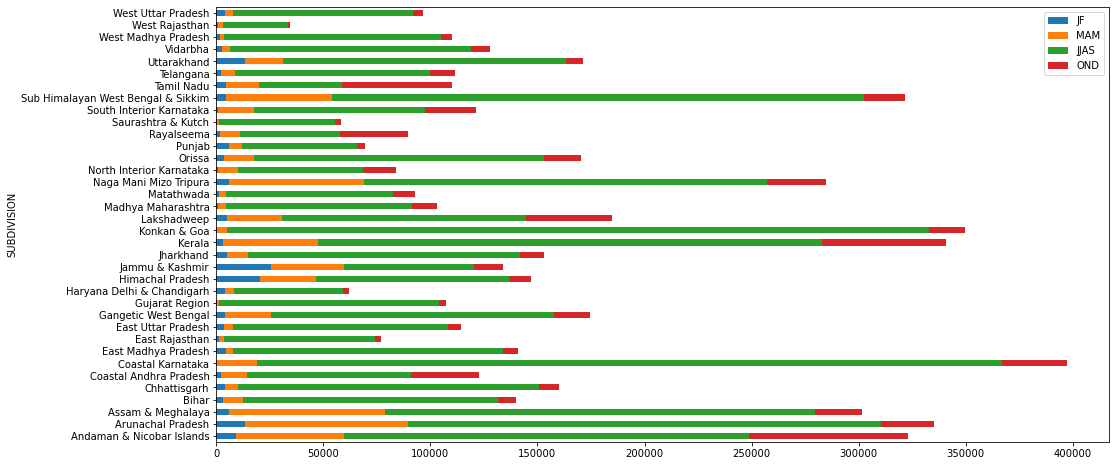

In [10]:
data[['SUBDIVISION', 'JF', 'MAM',
       'JJAS', 'OND']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));
plt.show()

SUBDIVISION
Haryana Delhi & Chandigarh    528.439316
Saurashtra & Kutch            496.398291
West Rajasthan                294.125641
Name: ANNUAL, dtype: float64


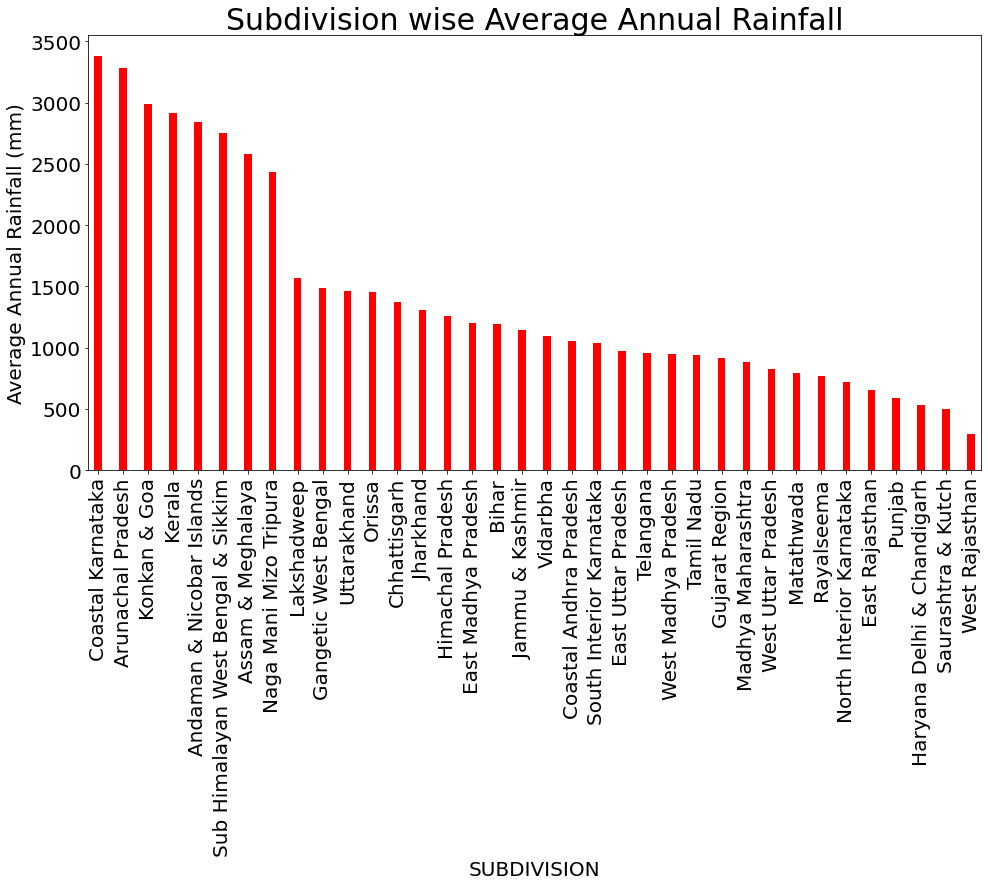

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])
plt.show()

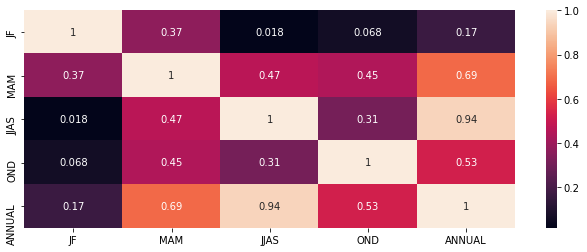

In [12]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JF','MAM','JJAS','OND','ANNUAL']].corr(),annot=True)
plt.show()

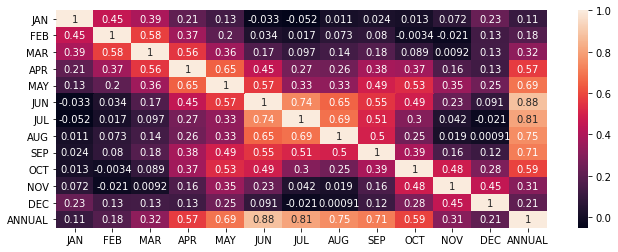

In [13]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [14]:
def plot_graphs(actual,prediction,title):        
    N = 9
    ind = np.arange(N)
    width = 0.27       

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, actual, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Actual', 'Prediction') )

    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
india =np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print("No of years (36 division * 117 yrs) and months ",india.shape)
X = None; y = None
for i in range(india.shape[1]-3):
    if X is None:
        X = india[:, i:i+3]
        y = india[:, i+3]
    else:
        X = np.concatenate((X, india[:, i:i+3]), axis=0) 
        y = np.concatenate((y, india[:, i+3]), axis=0)
        
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.1, random_state=42)
print("\n3 months rainfall training data: ",X_train3.shape)  
print("3 months rainfall testing data: ",X_test3.shape)
print("\n")

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg3 = linear_model.ElasticNet(alpha=0.5)
reg3.fit(X_train3, y_train3)
y_pred3 = reg3.predict(X_test3)
print("Mean Absolute Error is:",mean_absolute_error(y_test3, y_pred3))
print("Root mean squared error = ",np.sqrt(mean_squared_error(y_test3,y_pred3)))
print("r2_score= ",r2_score(y_test3,y_pred3)) 
print("\nCoefficients/Weights: ",reg3.coef_)
print("Intercept",reg3.intercept_)

No of years (36 division * 117 yrs) and months  (4188, 12)

3 months rainfall training data:  (33922, 3)
3 months rainfall testing data:  (3770, 3)


Mean Absolute Error is: 92.94719230113891
Root mean squared error =  142.90741305738166
r2_score=  0.4503301292217716

Coefficients/Weights:  [-0.18549245 -0.07436367  0.73667158]
Intercept 75.97702933075078


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
west_rajasthan =np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'West Rajasthan'])
print("No of years and months ",west_rajasthan.shape)
X = None; y = None
for i in range(west_rajasthan.shape[1]-3):
    if X is None:
        X = west_rajasthan[:, i:i+3] 
        y = west_rajasthan[:, i+3] 
    else:
        X = np.concatenate((X, west_rajasthan[:, i:i+3]), axis=0)
        y = np.concatenate((y, west_rajasthan[:, i+3]), axis=0)
        
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=42)
print("\n3 months rainfall training data: ",X_train1.shape)  
print("3 months rainfall testing data: ",X_test1.shape)
print("\n")

No of years and months  (117, 12)

3 months rainfall training data:  (947, 3)
3 months rainfall testing data:  (106, 3)




In [17]:
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'West Rajasthan'])
print(data_2010.size)
X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)
print(X_year_2010.shape,y_year_2010.shape)

12
(9, 3) (9,)


In [18]:
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'West Rajasthan'])
print(data_2015.size)

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)
print(X_year_2015.shape,y_year_2015.shape)

12
(9, 3) (9,)


In [19]:
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2017]

data_2017 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'West Rajasthan'])
print(data_2017.size)

X_year_2017 = None; y_year_2017 = None
for i in range(data_2017.shape[1]-3):
    if X_year_2017 is None:
        X_year_2017 = data_2017[:, i:i+3]
        y_year_2017 = data_2017[:, i+3]
    else:
        X_year_2017 = np.concatenate((X_year_2017, data_2017[:, i:i+3]), axis=0)
        y_year_2017 = np.concatenate((y_year_2017, data_2017[:, i+3]), axis=0)
print(X_year_2017.shape,y_year_2017.shape)

12
(9, 3) (9,)


In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg1 = linear_model.ElasticNet(alpha=0.5)
reg1.fit(X_train1, y_train1)
y_pred1 = reg1.predict(X_test1)
print("Mean Absolute Error is:",mean_absolute_error(y_test1, y_pred1))
print("Root mean squared error = ",np.sqrt(mean_squared_error(y_test1,y_pred1)))
print("r2_score= ",r2_score(y_test1,y_pred1)) 
print("\nCoefficients/Weights: ",reg1.coef_)
print("Intercept",reg1.intercept_)

Mean Absolute Error is: 32.771401118601524
Root mean squared error =  50.872050807481294
r2_score=  0.06691349277841763

Coefficients/Weights:  [-0.21098812 -0.0861065   0.41037212]
Intercept 27.596438837515834


MEAN 2010
52.12222222222222 34.02676664126041
Standard deviation 2010
58.99788654929896 26.634602948129942
MEAN 2015
47.32222222222222 33.30490794576738
Standard deviation 2015
69.54144691841098 33.17504730087313
MEAN 2017
44.18888888888889 32.50149730572616
Standard deviation 2017
67.00292604629615 31.67278264728604


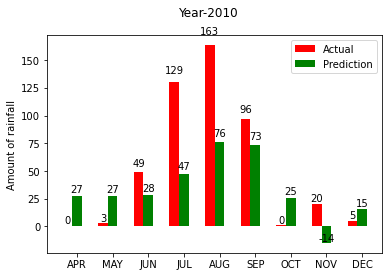

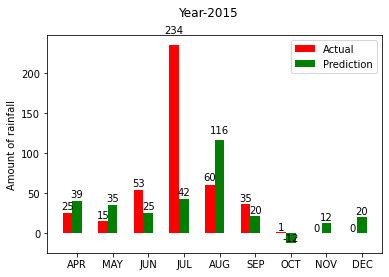

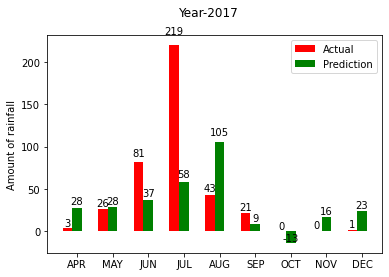

In [21]:
y_year_pred_2010 = reg1.predict(X_year_2010)

y_year_pred_2015 = reg1.predict(X_year_2015)

y_year_pred_2017 = reg1.predict(X_year_2017)

print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


print("MEAN 2017")
print(np.mean(y_year_2017),np.mean(y_year_pred_2017))
print("Standard deviation 2017")
print(np.sqrt(np.var(y_year_2017)),np.sqrt(np.var(y_year_pred_2017)))


plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")
plot_graphs(y_year_2017,y_year_pred_2017,"Year-2017")

In [22]:
east_rajasthan = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'East Rajasthan'])
print(east_rajasthan.shape)
X = None; y = None
for i in range(east_rajasthan.shape[1]-3):
    if X is None:
        X = east_rajasthan[:, i:i+3]
        y = east_rajasthan[:, i+3]
    else:
        X = np.concatenate((X, east_rajasthan[:, i:i+3]), axis=0)
        y = np.concatenate((y, east_rajasthan[:, i+3]), axis=0)
print(X.shape,y.shape)       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

(117, 12)
(1053, 3) (1053,)


In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean Absolute Error is:",mean_absolute_error(y_test, y_pred))
print("Root mean squared error = ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score= ",r2_score(y_test,y_pred))
print("\nCoefficients/Weights: ",reg.coef_)
print("Intercept",reg.intercept_)

Mean Absolute Error is: 56.538973356036415
Root mean squared error =  76.07604366576524
r2_score=  0.22935322415765558

Coefficients/Weights:  [-0.23945038 -0.17672476  0.54020684]
Intercept 62.237299019717476


MEAN 2010
52.12222222222222 69.4629540117722
Standard deviation 2010
58.99788654929896 33.453782721233175
MEAN 2015
47.32222222222222 68.47935283229714
Standard deviation 2015
69.54144691841098 42.81177287672905
MEAN 2017
44.18888888888889 67.60543587115919
Standard deviation 2017
67.00292604629615 40.604346109073056


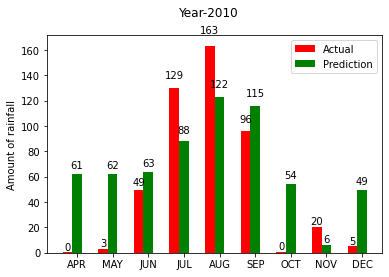

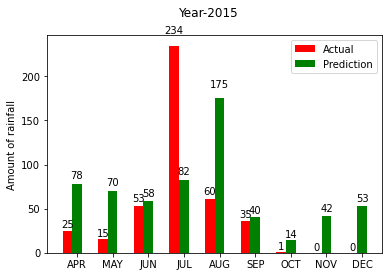

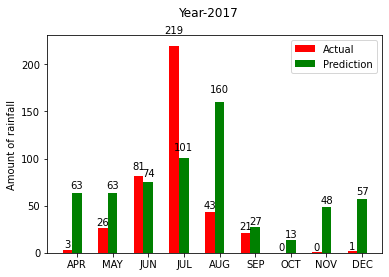

In [24]:
y_year_pred_2010 = reg.predict(X_year_2010)

y_year_pred_2015 = reg.predict(X_year_2015)
    
y_year_pred_2017 = reg.predict(X_year_2017)

print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


print("MEAN 2017")
print(np.mean(y_year_2017),np.mean(y_year_pred_2017))
print("Standard deviation 2017")
print(np.sqrt(np.var(y_year_2017)),np.sqrt(np.var(y_year_pred_2017)))

plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")
plot_graphs(y_year_2017,y_year_pred_2017,"Year-2017")

In [25]:
district = pd.read_csv("C:/Users/Dell/Sub_Division_IMD_2017.csv")
district.keys()

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [26]:
district.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [27]:
district= district.fillna(district.mean())
district.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

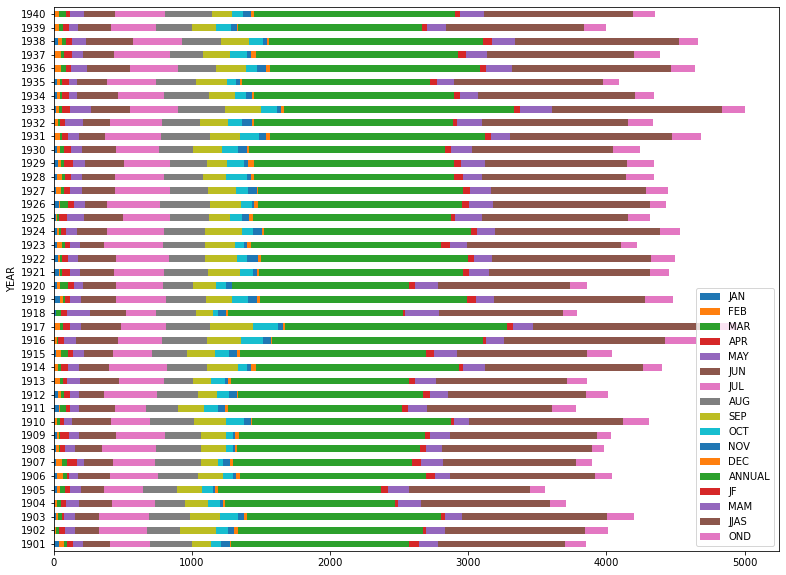

In [28]:
district.groupby('YEAR').mean()[:40].plot.barh(stacked=True,figsize=(13,10));
plt.show()

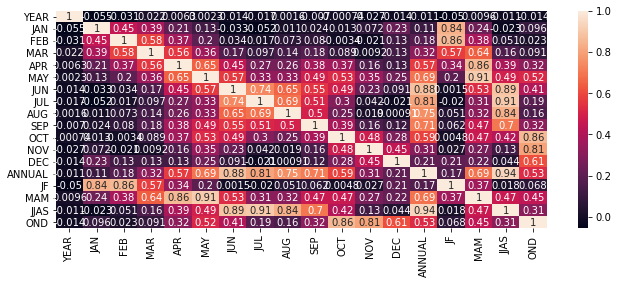

In [29]:
plt.figure(figsize=(11,4))
sns.heatmap(district.corr(),annot=True)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC']])
X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg1 = linear_model.ElasticNet(alpha=0.5)
reg1.fit(X_train2, y_train2)
y_pred2 = reg1.predict(X_test2)
print("Mean Absolute Error is:",mean_absolute_error(y_test2, y_pred2))
print("Root mean squared error = ",np.sqrt(mean_squared_error(y_test2,y_pred2)))
print("r2_score= ",r2_score(y_test2,y_pred2))

Mean Absolute Error is: 87.32465699425569
Root mean squared error =  138.65988199037238
r2_score=  0.47850613610298487
